##Proponer, y realizar, al menos 2 tests sobre el generador congruencial lineal implementado en el Ejercicio 1. Evaluar e interpretar los resultados de cada uno.

In [ ]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2
from scipy import stats
#from Ejercicio1 import generador_congruencial_lineal_normalizado

## Generador del Ejercicio - 1

In [ ]:
Xo = 0

In [ ]:
def semilla_gcl(semilla=102030):
  global Xo
  Xo = semilla

In [ ]:
def generador_congruencial_lineal_normalizado(iteraciones):
  m=2**32
  a=1013904223
  c=1664525
  global Xo

  numeros_aleatorios = []
  for i in range(0,iteraciones):
    X = (a * Xo + c) % m
    numeros_aleatorios.append(X/m)
    Xo = X
  return numeros_aleatorios

##Test 1 - Chi 2

1) Elegimos el nivel de significacion con el que vamos a trabajar: 
 *  Nivel de significacion = 0,05



2) Obtenemos el limite de la zona de aceptacion / rechazo para k-1 grado de libertad. 

*  K = 10
*  Grados de libertad = 9 


3) Calculamos el estadistico con los datos del experimento estudiado, en este caso un GCL.

* D^2 = SUM ( (Fo - Fe)^2 / Fe)

Para poder calcularlo, tenemos que discretizar en intervalos nuestro experimento y calcular las frecuencias observadas y las frecuencias esperadas.


4) Verificamos si se puede aceptar la hipótesis HO: "El estimador es bueno para una uniforme(0,1)."

In [ ]:
limite_superior = chi2.ppf((0.95), df=9)

In [ ]:
def frecuencias_observadas(numeros_aleatorios, k):
    intervalos = []
    frecuencias_obs = []

    for numero in numeros_aleatorios:
      intervalos.append(int(numero * k +1))

    for i in range(1,k+1):
      frecuencias_obs.append(intervalos.count(i))

    return frecuencias_obs

In [ ]:
def frecuencias_esperadas(cantidad_generados, k):
  frecuencias_esp = []

  for i in range(1,k+1):
    frecuencias_esp.append(((1/k)*cantidad_generados))

  return frecuencias_esp

In [ ]:
def test_chi_cuadrado(numeros_aleatorios, cantidad_generados, alpha, k, observadas, esperadas):
  frecuencia_obs = observadas(numeros_aleatorios, k)
  frecuencia_esp = esperadas(cantidad_generados, k)
 
  limite_superior = chi2.ppf((1 - alpha), df=(k-1))

  d2 = sum((frecuencia_obs[i] - frecuencia_esp[i])**2 / frecuencia_esp[i] for i in range(k))

  
  if d2 <= limite_superior:
    print('El test acepta la hipotesis nula.')
  else:
    print('El test rechaza la hipotesis nula.')


## Pruebas: 

In [ ]:
cant_generados = 10000
nivel_de_significacion = 0.05
k = 10
numeros_aleatorios = generador_congruencial_lineal_normalizado(cant_generados)

test_chi_cuadrado(numeros_aleatorios, cant_generados, nivel_de_significacion, k,  frecuencias_observadas, frecuencias_esperadas)

El test acepta la hipotesis nula.


###Una vez que probamos el test, podemos decir que aceptamos la hipótesis y el generador GCL puede ser aceptado.

## Test 2 - Gap Test


* Inicialmente elejimos la cantidad de gaps. 

* Para obtener las muestras, se utiliza el generador congruencial lineal (GCL) implementado en el ejercicio 1. 

* Iteramos hasta definir el tamaño de cada gap, es decir, contamos la cantidad de numeros aleatorios generados de forma consecutiva entre la generación de un número que pertenece al intervalo [α , β] y el próximo número generado que vuelve a pertenecer al intervalo.

* Una vez calculados los gaps se aplica un test Chi-2 con las probabilidades observadas y esperadas, lo resolvemos : 

1) Calculamos las probabilidad observada y la esperada: 

* Para las probabilidad observada, decimos que para un gap de tamaño i, 
su probabilidad es = la cantidad de gaps de tamaño i / la cantidad total de gaps.

* Para las probabilidad esperada, decimos que para un gap de tamaño i, su probabilidad es =  pi = p ∗ ((1 − p)(i)) donde p = β − α (largo del intervalo). Cabe destacar que esto distribuye de forma geometrica.

2) Calculamos el limite superior, utilizando como nivel de significacion 0.01.

3) Verificamos si se puede aceptar la hipótesis HO: "El estimador es bueno para una uniforme(0,1)."

In [ ]:
def probabilidades_observadas(gaps, cantidad_gaps):
  gap_maximo = int(max(gaps)) + 1
  observadas = np.zeros(gap_maximo)

  for i in range(gap_maximo):
    numero_ocurrencia = np.count_nonzero(gaps == i)
    observadas[i] = numero_ocurrencia / cantidad_gaps
  
  return observadas

In [ ]:
def probabilidades_esperadas(gaps, alpha, beta):
  p = beta - alpha
  gap_maximo = int(max(gaps)) + 1
  esperadas = np.zeros(gap_maximo)

  for i in range(gap_maximo):
    esperadas[i] = p * ((1 - p) ** (i))
  
  return esperadas

In [ ]:
def gap_test(cantidad_gaps, alpha, beta, nivel_de_significacion):
    gap_actual = 0
    gaps = np.zeros(cantidad_gaps)
    numero_aleatorio = generador_congruencial_lineal_normalizado(1)

    while gap_actual < cantidad_gaps:

        if (numero_aleatorio[0] > alpha) and (numero_aleatorio[0] <= beta):
            gap_actual += 1

        else:
            gaps[gap_actual] += 1

        numero_aleatorio = generador_congruencial_lineal_normalizado(1)


    gap_maximo = int(max(gaps)) + 1

    probabilidad_observada = probabilidades_observadas(gaps, cantidad_gaps)
    probabilidad_esperada = probabilidades_esperadas(gaps, alpha, beta)
    
    limite_superior = chi2.ppf((1 - nivel_de_significacion), df=(gap_maximo-1))
    d2 = sum((probabilidad_observada[i] - probabilidad_esperada[i])**2 / probabilidad_esperada[i] for i in range(gap_maximo))

    if d2 <= limite_superior:
      print('El test acepta la hipotesis nula.')
      
    else:
      print('El test rechaza la hipotesis nula.')

    return (gaps)

###Pruebas: 

In [ ]:
gap_test(10, 0.2, 0.5, 0.01)

El test acepta la hipotesis nula.


array([ 4.,  1.,  1.,  0.,  3., 10.,  1.,  6.,  0.,  7.])

In [ ]:
gap_test(1000, 0.1, 0.3, 0.05)

El test acepta la hipotesis nula.


array([ 1.,  3.,  1.,  0.,  2.,  1.,  4.,  4.,  8.,  0.,  0.,  3.,  1.,
        0.,  0.,  0.,  2.,  2.,  3., 19.,  2., 21.,  4.,  5.,  1.,  6.,
        0., 34.,  7.,  0.,  3., 14.,  1.,  8.,  5.,  6.,  4.,  2.,  9.,
        0., 11.,  0.,  1.,  4.,  0.,  2., 13.,  3.,  4.,  4.,  0.,  0.,
        5.,  1.,  4.,  4.,  2.,  7.,  1.,  0.,  0.,  2.,  0.,  4.,  1.,
        3., 24.,  1.,  8.,  1.,  8., 11.,  5.,  3.,  3.,  1., 10.,  3.,
        4.,  2.,  6.,  2.,  2.,  3.,  3.,  2.,  7.,  3.,  5.,  0., 14.,
        7.,  0.,  4.,  4.,  1.,  0.,  0.,  1., 15.,  0.,  0.,  0.,  3.,
        4.,  1.,  2., 12.,  5.,  0.,  3., 10.,  0.,  1.,  0.,  1.,  6.,
        6.,  0.,  1.,  4.,  3.,  4.,  1.,  2.,  4.,  2., 18.,  0.,  3.,
        3.,  5.,  6.,  4.,  6.,  0., 10.,  6.,  6.,  0.,  2.,  7., 10.,
        4.,  3.,  9.,  0., 12.,  0.,  9.,  0.,  2.,  2.,  3.,  4.,  1.,
        6.,  2.,  2.,  3.,  3.,  2.,  0.,  0.,  5., 14.,  1.,  0.,  0.,
       10.,  1.,  4., 11.,  0.,  2.,  5.,  2.,  3.,  0.,  6.,  0

El test acepta la hipotesis nula.


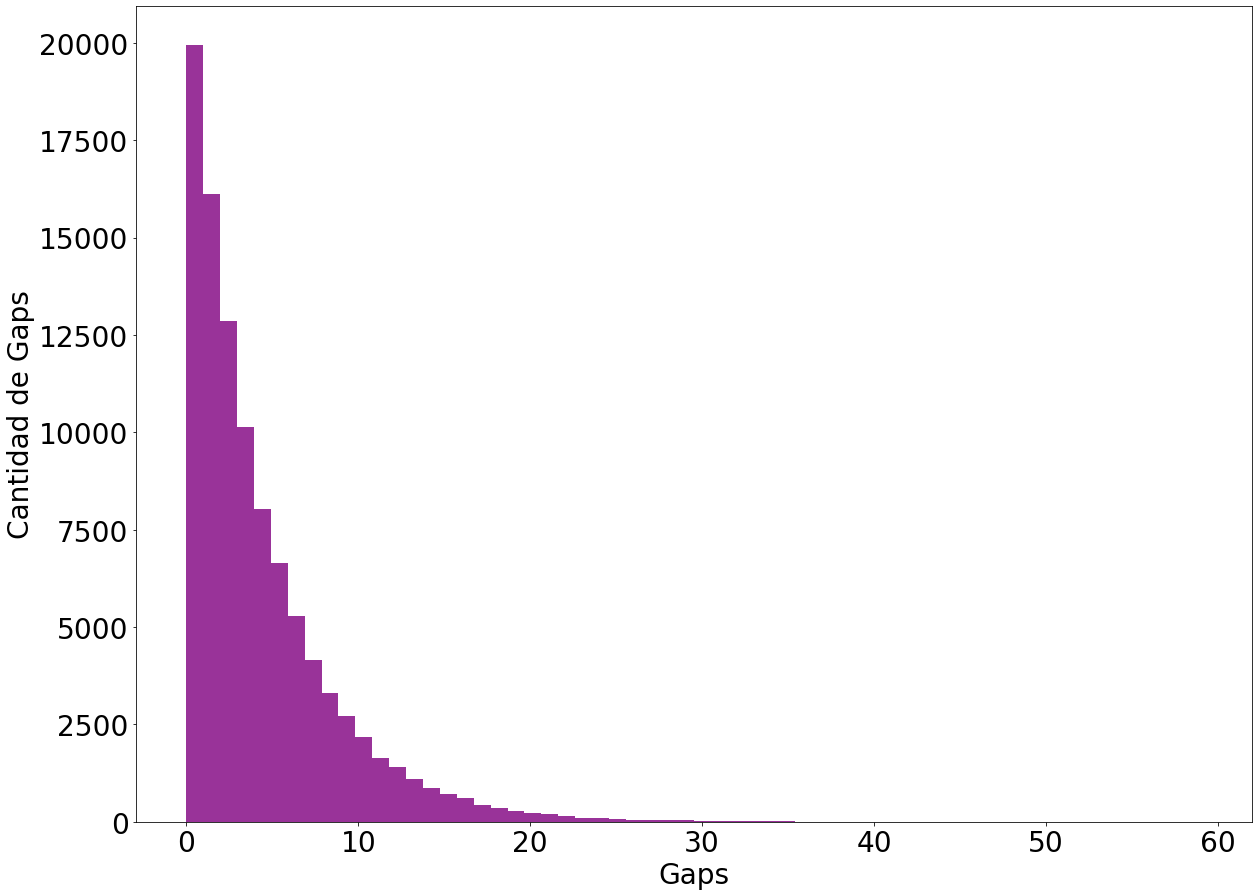

In [ ]:
gaps = gap_test(100000, 0.1, 0.3, 0.01)
plt.figure(figsize=[20,15])
plt.hist(gaps, bins=60, color="purple",  alpha=0.8)
plt.xlabel("Gaps", fontsize=28)
plt.ylabel("Cantidad de Gaps", fontsize=28)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.show()

###Una vez que probamos el test, podemos decir que aceptamos la hipótesis y el generador GCL puede ser aceptado.